## 2. 
### Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray). 

Example 1:

Input: [1,3,5,4,7]

Output: 3 

Example 2:

Input: [2,2,2,2,2]

Output: 1

In [1]:
nums = list(map(int, input("Enter the array of integers separated by commas: ").split(',')))
current_length = 1
max_length = 1
for i in range(1, len(nums)):
    if nums[i] > nums[i - 1]:
        current_length += 1
        max_length = max(max_length, current_length)
    else:
        current_length = 1

print("Length of the longest continuous increasing subsequence:", max_length)


Enter the array of integers separated by commas: 1,2,3,4,6,5
Length of the longest continuous increasing subsequence: 5


## 3. 
### Given a list of non negative integers, arrange them such that they form the largest number.

Example 1:

Input: [10,2]

Output: '210'

Example 2:
 
Input: [3,30,34,5,9]

Output: '9534330'

In [2]:
nums = input('please provide an input: ').split(',')

def compare(x, y):
    return int(y + x) - int(x + y)

nums.sort(key=lambda x: (x[0], x), reverse=True)

if nums[0] == '0':
    print('0')
else:
    largest_num = ''.join(nums)
    print("Largest number:", largest_num)


please provide an input: 2,1,0
Largest number: 210


## 4.
### Store all the &quot;servlet-name&quot;, and &quot;servlet-class&quot; to a csv file from the attached sample_json.json file using Python.

In [3]:
import json
import csv

# Load the JSON data
with open(r"C:\Users\NEW\Downloads\DT A1 sample_json (1) (1).json", "r") as file:
    data = json.load(file)

servlets = data["web-app"]["servlet"]

csv_data = [["servlet-name", "servlet-class", "init-param"]]
for servlet in servlets:
    servlet_name = servlet["servlet-name"]
    servlet_class = servlet["servlet-class"]
    init_param = servlet.get("init-param", {})
    init_param_str = "; ".join([f"{key}: {value}" for key, value in init_param.items()])
    csv_data.append([servlet_name, servlet_class, init_param_str])

with open("servlet_data.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(csv_data)

print("CSV_file_created!!!")


CSV_file_created!!!


In [4]:
with open("servlet_data.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        print(row)


['servlet-name', 'servlet-class', 'init-param']
['cofaxCDS', 'org.cofax.cds.CDSServlet', "configGlossary:installationAt: Philadelphia, PA; configGlossary:adminEmail: ksm@pobox.com; configGlossary:poweredBy: Cofax; configGlossary:poweredByIcon: /images/cofax.gif; configGlossary:staticPath: /content/static; templateProcessorClass: org.cofax.WysiwygTemplate; templateLoaderClass: org.cofax.FilesTemplateLoader; templatePath: templates; templateOverridePath: ; defaultListTemplate: listTemplate.htm; defaultFileTemplate: articleTemplate.htm; useJSP: false; jspListTemplate: listTemplate.jsp; jspFileTemplate: articleTemplate.jsp; cachePackageTagsTrack: 200; cachePackageTagsStore: 200; cachePackageTagsRefresh: 60; cacheTemplatesTrack: 100; cacheTemplatesStore: 50; cacheTemplatesRefresh: 15; cachePagesTrack: 200; cachePagesStore: 100; cachePagesRefresh: 10; cachePagesDirtyRead: 10; searchEngineListTemplate: forSearchEnginesList.htm; searchEngineFileTemplate: forSearchEngines.htm; searchEngineRobot

# 1.
### Download the data from the file data source and provide possible data insights.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### “The provided data set is too large, so we will use a subset of 500,000 rows for this analysis.”

In [6]:
data = pd.read_csv('C:/Users/NEW/Desktop/complaints.csv', nrows=500000)

print(data)


       Date received                                            Product  \
0         2024-01-23  Credit reporting or other personal consumer re...   
1         2024-01-24  Credit reporting or other personal consumer re...   
2         2024-01-24  Credit reporting or other personal consumer re...   
3         2024-01-23  Credit reporting or other personal consumer re...   
4         2024-01-23  Credit reporting or other personal consumer re...   
...              ...                                                ...   
499995    2024-01-29  Credit reporting or other personal consumer re...   
499996    2024-01-29  Credit reporting or other personal consumer re...   
499997    2024-02-29                                    Debt collection   
499998    2024-02-29  Credit reporting or other personal consumer re...   
499999    2024-01-29  Credit reporting or other personal consumer re...   

             Sub-product                                 Issue  \
0       Credit reporting  Incorre

C:\Users\NEW\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [8]:
print(data.count())


Date received                   500000
Product                         500000
Sub-product                     499998
Issue                           499998
Sub-issue                       492917
Consumer complaint narrative     80211
Company public response         173568
Company                         500000
State                           498727
ZIP code                        499998
Tags                             22619
Consumer consent provided?      254411
Submitted via                   500000
Date sent to company            500000
Company response to consumer    499995
Timely response?                500000
Consumer disputed?                   2
Complaint ID                    500000
dtype: int64


C:\Users\NEW\AppData\Local\Temp/ipykernel_8252/2667153257.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


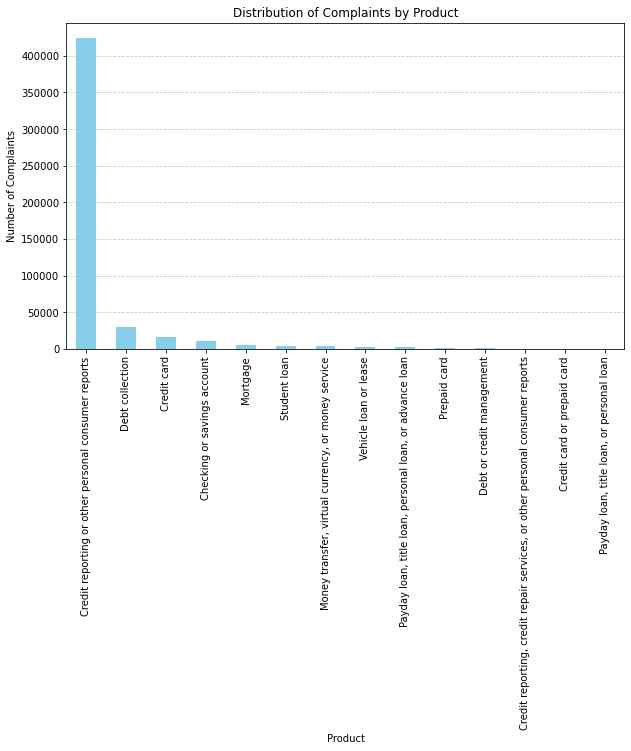

In [9]:
if 'Product' in data.columns:
    product_counts = data['Product'].value_counts()
    if not product_counts.empty:
        # Plot the bar chart
        plt.figure(figsize=(10, 6))
        product_counts.plot(kind='bar', color='skyblue')
        plt.title('Distribution of Complaints by Product')
        plt.xlabel('Product')
        plt.ylabel('Number of Complaints')
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("The 'Product' column is empty.")
else:
    print("The 'Product' column does not exist in the dataframe.")



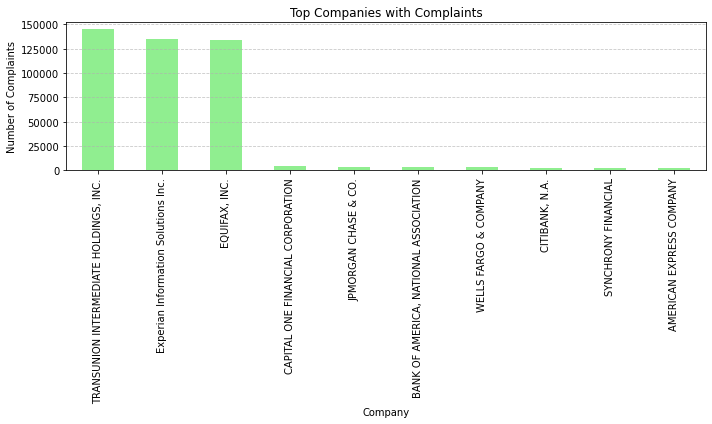

In [10]:
# Count the number of complaints for each company
company_counts = data['Company'].value_counts().head(10)  # Get top 10 companies

# Plot the bar chart
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='lightgreen')
plt.title('Top Companies with Complaints')
plt.xlabel('Company')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

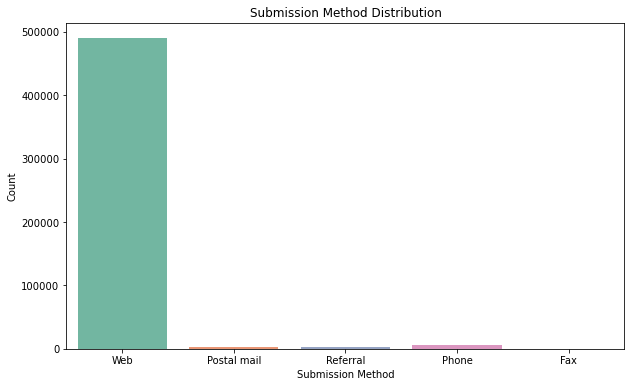

In [12]:
# Submission Method Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Submitted via', data=data, palette='Set2')
plt.title('Submission Method Distribution')
plt.xlabel('Submission Method')
plt.ylabel('Count')
plt.show()


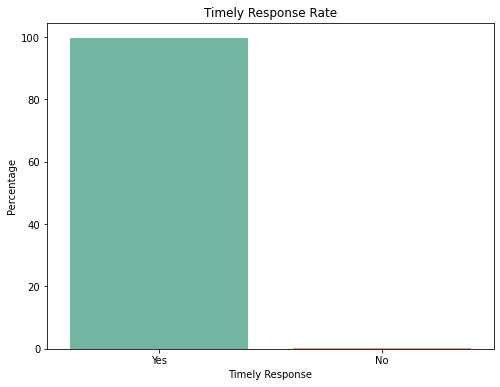

In [13]:
# Calculate the timely response rate
timely_response_rate = data['Timely response?'].value_counts(normalize=True) * 100

# Plot the timely response rate
plt.figure(figsize=(8, 6))
sns.barplot(x=timely_response_rate.index, y=timely_response_rate.values, palette='Set2')
plt.title('Timely Response Rate')
plt.xlabel('Timely Response')
plt.ylabel('Percentage')
plt.show()


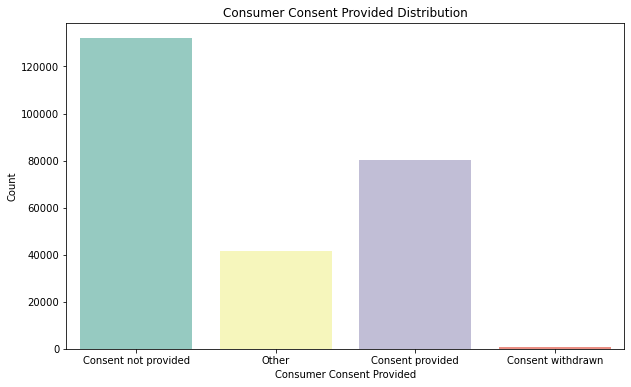

In [14]:
# Consumer Consent Provided Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Consumer consent provided?', data=data, palette='Set3')
plt.title('Consumer Consent Provided Distribution')
plt.xlabel('Consumer Consent Provided')
plt.ylabel('Count')
plt.show()
